In [33]:
!pip install wordcloud
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# Load dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\Instruments_Reviews.csv")

In [36]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [37]:
# Define sentiment labeling based on ratings
def label_sentiment(rating):
    if rating >= 4.0:
        return 1  # Positive
    elif rating == 3.0:
        return 0  # Neutral
    else:
        return -1  # Negative

df['sentiment'] = df['overall'].apply(label_sentiment)

In [38]:
# Text Preprocessing
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = ' '.join(text.split())
        return text
    return ""

df['cleaned_review'] = df['reviewText'].apply(preprocess_text)

In [71]:
# Sentiment Analysis using TextBlob
def get_sentiment(text):
    if isinstance(text, str):  # Check if the input is a string
        return TextBlob(text).sentiment.polarity
    return 0.0  # Default polarity for non-string values (e.g., NaN)

df['textblob_polarity'] = df['cleaned_review'].apply(get_sentiment)
df['textblob_sentiment'] = df['textblob_polarity'].apply(
    lambda x: "Positive (1)" if x > 0 else ("Negative (-1)" if x < 0 else "Neutral (0)")
)

# Print a sample output
print(df[['cleaned_review', 'textblob_polarity', 'textblob_sentiment']].head())


                                      cleaned_review  textblob_polarity  \
0  not much to write about here but it does exact...           0.250000   
1  the product does exactly as it should and is q...           0.014286   
2  the primary job of this device is to block the...           0.167500   
3  nice windscreen protects my mxl mic and preven...           0.200000   
4  this pop filter is great it looks and performs...           0.800000   

  textblob_sentiment  
0       Positive (1)  
1       Positive (1)  
2       Positive (1)  
3       Positive (1)  
4       Positive (1)  


In [50]:
# Model Evaluation
accuracy = accuracy_score(df['sentiment'], df['textblob_sentiment'])
report = classification_report(df['sentiment'], df['textblob_sentiment'])
print(f"Accuracy: {accuracy:.2f}\n")
print(report)

Accuracy: 0.83

              precision    recall  f1-score   support

          -1       0.17      0.25      0.20       467
           0       0.08      0.02      0.03       772
           1       0.89      0.93      0.91      9022

    accuracy                           0.83     10261
   macro avg       0.38      0.40      0.38     10261
weighted avg       0.80      0.83      0.81     10261



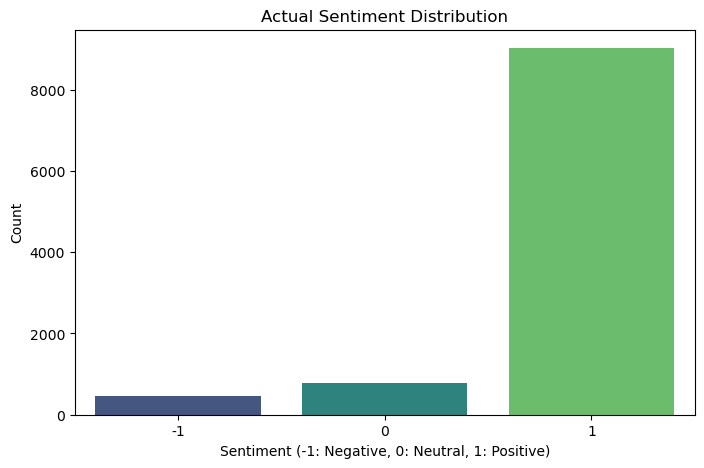

In [51]:
# Visualization - Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sentiment'], palette='viridis')
plt.title("Actual Sentiment Distribution")
plt.xlabel("Sentiment (-1: Negative, 0: Neutral, 1: Positive)")
plt.ylabel("Count")
plt.show()

In [52]:
# Visualization - WordCloud for Positive & Negative Reviews
positive_text = ' '.join(df[df['sentiment'] == 1]['cleaned_review'])
negative_text = ' '.join(df[df['sentiment'] == -1]['cleaned_review'])

TypeError: sequence item 2631: expected str instance, float found

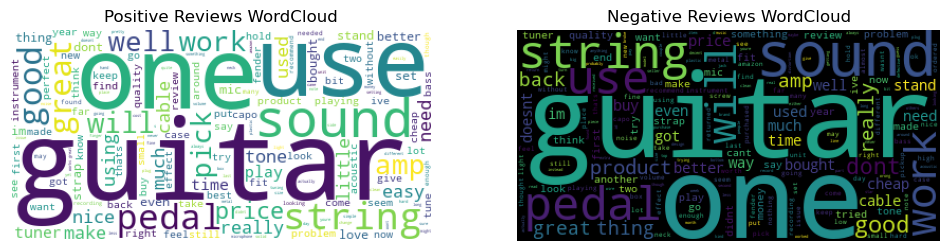

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=400, height=200, background_color='white').generate(positive_text))
plt.axis("off")
plt.title("Positive Reviews WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=400, height=200, background_color='black').generate(negative_text))
plt.axis("off")
plt.title("Negative Reviews WordCloud")

plt.show()

In [74]:
import plotly.express as px

# Count sentiment distribution
sentiment_counts = df['textblob_sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Create interactive pie chart
fig = px.pie(sentiment_counts, values='Count', names='Sentiment', 
             title="Sentiment Distribution", hole=0.3, color_discrete_sequence=px.colors.qualitative.Set3)

fig.show()

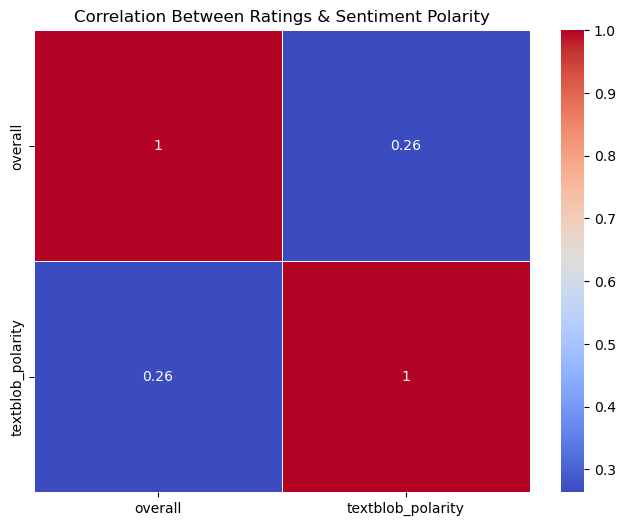

In [77]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df[['overall', 'textblob_polarity']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Ratings & Sentiment Polarity")
plt.show()


In [79]:
import plotly.express as px

# Convert date column to datetime format (modify column name accordingly)
df['date'] = pd.to_datetime(df['reviewTime'], errors='coerce')

# Group by date and sentiment
sentiment_trend = df.groupby([df['date'].dt.date, 'textblob_sentiment']).size().reset_index(name='Count')

# Plot interactive trend
fig = px.line(sentiment_trend, x='date', y='Count', color='textblob_sentiment',
              title="Sentiment Trend Over Time", markers=True)

fig.show()


In [61]:
# Save the updated dataset
df1.to_csv("Instruments_Reviews_Cleaned.csv", index=False)

In [62]:
df1 = pd.read_csv(r"C:\Users\admin\Instruments_Reviews_Cleaned.csv")

In [72]:
# Function to analyze sentiment for any given input text
def analyze_custom_review():
    review_text = input("Enter your review: ")  # Take input from user
    cleaned_text = preprocess_text(review_text)
    polarity = get_sentiment(cleaned_text)
    sentiment = "Positive (1)" if polarity > 0 else ("Negative (-1)" if polarity < 0 else "Neutral (0)")
    
    # Print the result line by line
    print("\n--- Sentiment Analysis Result ---")
    print(f"Original Review: {review_text}")
    print(f"Cleaned Review: {cleaned_text}")
    print(f"Polarity Score: {polarity}")
    print(f"Predicted Sentiment: {sentiment}")

# Run sentiment analysis with user input
analyze_custom_review()

Enter your review: Good quality cable and sounds very good

--- Sentiment Analysis Result ---
Original Review: Good quality cable and sounds very good
Cleaned Review: good quality cable and sounds very good
Polarity Score: 0.8049999999999999
Predicted Sentiment: Positive (1)
